<a href="https://colab.research.google.com/github/dineshnain00/CODING-SAMURAI-INTERNSHIP-TASK-/blob/main/sales_analysis_linear_regression_on_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
file_path=pd.read_csv("Retail and wherehouse Sale.csv")
df=file_path
print(df)

# Convert numeric columns
for col in ["RETAIL SALES", "RETAIL TRANSFERS", "WAREHOUSE SALES"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Handle missing values (fill with 0)
df.fillna({"RETAIL SALES": 0, "RETAIL TRANSFERS": 0, "WAREHOUSE SALES": 0}, inplace=True)

       YEAR  MONTH                              SUPPLIER ITEM CODE  \
0      2020      1     REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1      2020      1                             PWSWN INC    100024   
2      2020      1               RELIABLE CHURCHILL LLLP      1001   
3      2020      1             LANTERNA DISTRIBUTORS INC    100145   
4      2020      1                  DIONYSOS IMPORTS INC    100293   
...     ...    ...                                   ...       ...   
29995  2020      3  THE COUNTRY VINTNER, LLC DBA WINEBOW    352322   
29996  2020      3                       OSLO ENTERPRISE    352324   
29997  2020      3       OPICI FAMILY DISTRIBUTING OF MD    352354   
29998  2020      3                   CAMPARI AMERICA LLC     35238   
29999  2020      3  THE COUNTRY VINTNER, LLC DBA WINEBOW    352380   

                            ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                        BOOTLEG RED - 750ML      WINE          0.00   
1              

In [ ]:
import numpy as no
import matplotlib.pyplot as plt
# =============================
# Project 1: Sales Data Analysis
# =============================

# Create TOTAL SALES column
df["TOTAL SALES"] = df["RETAIL SALES"] + df["WAREHOUSE SALES"]

# Basic statistics
print("===== Basic Statistics =====")
print("Total Retail Sales:", df["RETAIL SALES"].sum())
print("Total Warehouse Sales:", df["WAREHOUSE SALES"].sum())
print("Average Retail Sales:", df["RETAIL SALES"].mean())
print("Average Warehouse Sales:", df["WAREHOUSE SALES"].mean())

===== Basic Statistics =====
Total Retail Sales: 208186.94000000003
Total Warehouse Sales: 822930.9299999999
Average Retail Sales: 6.9395646666666675
Average Warehouse Sales: 27.431030999999997


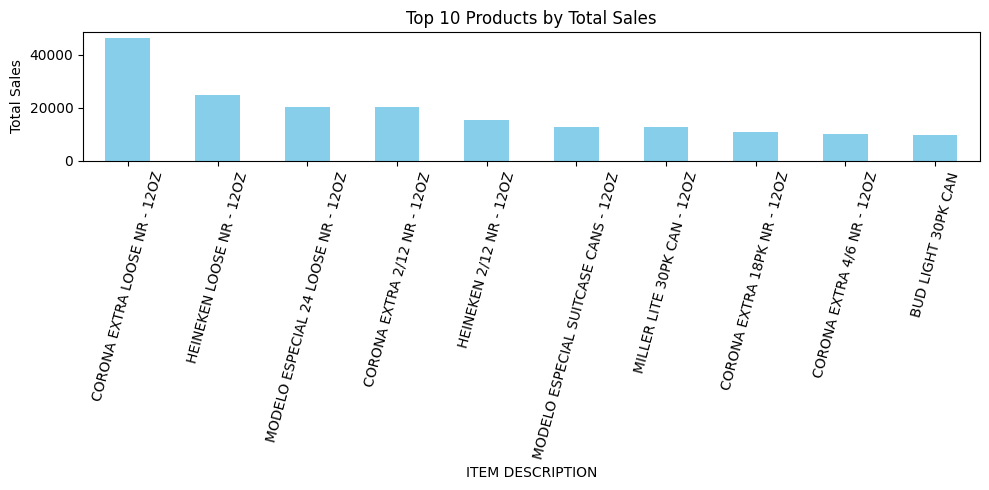

In [ ]:
# Top 10 products
top_products = df.groupby("ITEM DESCRIPTION")["TOTAL SALES"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind="bar", color="skyblue")
plt.title("Top 10 Products by Total Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

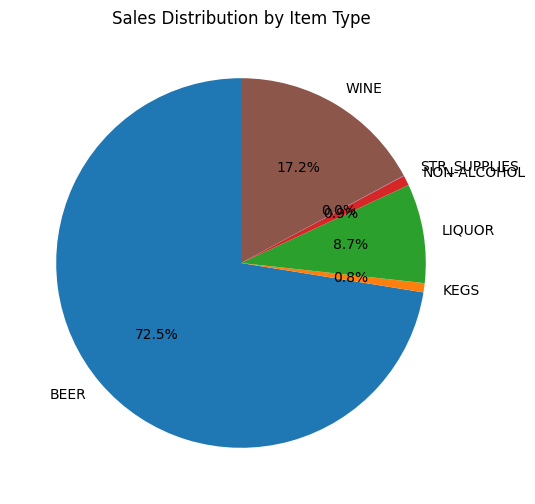

In [ ]:
# Sales by Item Type (Pie)
sales_by_type = df.groupby("ITEM TYPE")["TOTAL SALES"].sum()
sales_by_type = sales_by_type[sales_by_type > 0]  # filter negatives

plt.figure(figsize=(6,6))
sales_by_type.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Sales Distribution by Item Type")
plt.ylabel("")
plt.show()

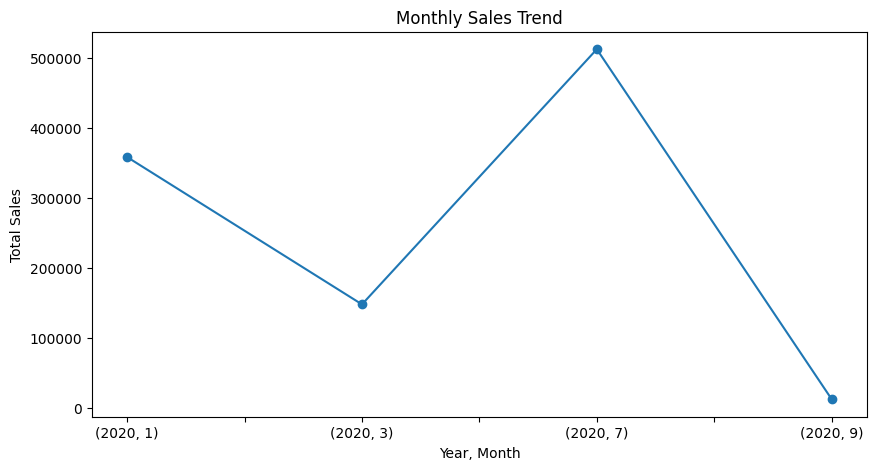

In [ ]:

# Monthly Sales Trend
monthly_sales = df.groupby(["YEAR", "MONTH"])["TOTAL SALES"].sum()
plt.figure(figsize=(10,5))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Year, Month")
plt.show()

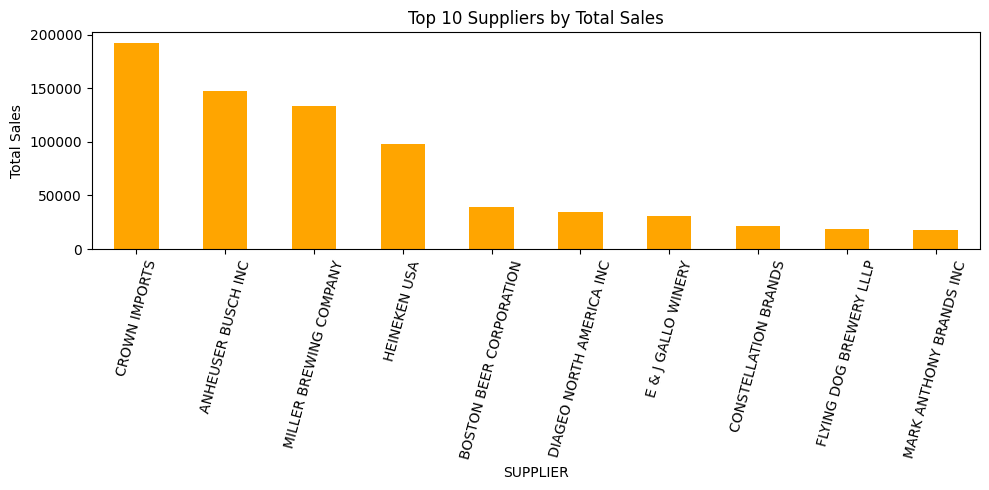

In [ ]:
# Supplier Contribution
top_suppliers = df.groupby("SUPPLIER")["TOTAL SALES"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_suppliers.plot(kind="bar", color="orange")
plt.title("Top 10 Suppliers by Total Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

===== Linear Regression Evaluation =====
R² Score: 0.2087412469925024
MAE: 8.700289118327895
RMSE: 20.97167354285257


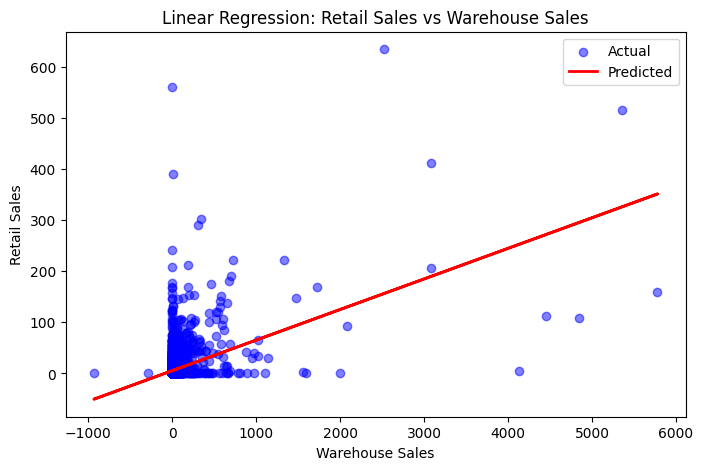

In [ ]:
# =============================
# Project 2: Linear Regression
# =============================

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Example: Predict Retail Sales from Warehouse Sales
X = df[["WAREHOUSE SALES"]]  # Feature
y = df["RETAIL SALES"]       # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("===== Linear Regression Evaluation =====")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Visualization
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color="blue", alpha=0.5, label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted")
plt.title("Linear Regression: Retail Sales vs Warehouse Sales")
plt.xlabel("Warehouse Sales")
plt.ylabel("Retail Sales")
plt.legend()
plt.show()